# Heat and Fast Fourier Transform 3D Cube
This project was done as part of a course in Numerical Methods. The following solves the Heat Diffusion equation by utitlizing Fast Fourier Transforms with initial condition the unit box $[-1,1]^3$. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Parameters

In [7]:
a = -2
b = 2
n = 64
tau = 0.05
k = np.linspace(-n/2,n/2+1, n)
x = np.linspace(a,b,n+1)
y = np.linspace(a,b,n+1)
z = np.linspace(a,b,n+1)
iterates1 = 2
iterates2 = 20

### Initial Condition

In [8]:
def initial_mat(x,y,z,n):
    initial=np.zeros(shape=(n,n,n))
    for i in range(0,len(x)-1):
        for j in range(0,len(x)-1):
        	for k in range(0,len(x)-1):
        		if abs(x[i]) < 1 and abs(y[j]) < 1 and abs(z[k]) < 1:
        			initial[i,j,k]=1
        		else:
        			initial[i,j,k]=0
    return(initial)

### Solve with Fourier Transforms

In [9]:

def fourier_solve(u,k,tau):
	ker = np.fft.fftshift(np.exp(-k**2*tau))
	for k in range(0,len(x)-1):
		for i in range(0, len(x)-1):
			u[k,i] = np.fft.ifft(np.fft.fft(u[k,i])*ker)
		u[k] = np.transpose(u[k])
		for j in range(0,len(y)-1):
			u[k,j] = np.fft.ifft(np.fft.fft(u[k,j])*ker)
		u[k] = np.transpose(u[k])
	u = np.transpose(u)
	for k in range(0,len(x)-1):
		for i in range(0, len(x)-1):
			u[k,i] = np.fft.ifft(np.fft.fft(u[k,i])*ker)
		u[k] = np.transpose(u[k])
		for j in range(0,len(y)-1):
			u[k,j] = np.fft.ifft(np.fft.fft(u[k,j])*ker)
		u[k] = np.transpose(u[k])
	u=np.transpose(u)
	for k in range(0,len(x)-1):
		for i in range(0, len(x)-1):
			u[k,i] = np.fft.ifft(np.fft.fft(u[k,i])*ker)
		u[k] = np.transpose(u[k])
		for j in range(0,len(y)-1):
			u[k,j] = np.fft.ifft(np.fft.fft(u[k,j])*ker)
		u[k] = np.transpose(u[k])
	return u

In [10]:
def fourier_iterate(x,y,z,k,iterates,tau):
	u = initial_mat(x,y,z,n)
	heat_source = u[:,:,0]
	for i in range(0, iterates):
		u_next = fourier_solve(u,k,tau)
		u_next[:,:,0] = heat_source
		u = u_next
	return u

### Plots

Initial Condition

C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


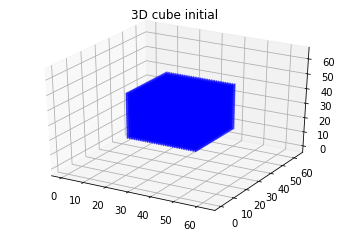

In [11]:
u_initial = initial_mat(x,y,z,n)
u = fourier_iterate(x,y,z,k,iterates1,tau)

X,Y,Z=u.nonzero()
fig=plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z,c='blue',s=u_initial)
plt.title('3D cube initial')
plt.show()

After 2 iterations

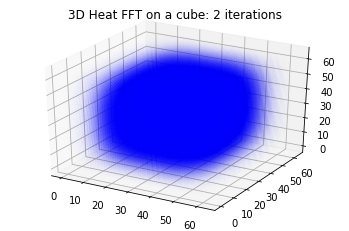

In [12]:
fig=plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z,c='blue',s=u)
plt.title('3D Heat FFT on a cube: 2 iterations')
plt.show()

After 3 iterations

C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\saeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


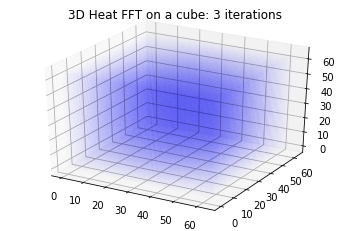

In [13]:
u = fourier_iterate(x,y,z,k,iterates2,tau)
fig=plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z,c='blue',s=u)
plt.title('3D Heat FFT on a cube: 3 iterations')
plt.show()